# Iris Closure Calibration

The 'standard' OPT setup is to set the DOF to be half the sample size. This places a restriction on the magnification, hence the resolution we can achieve.

The f number N is defined to be

$$N = \frac{f}{D}$$

where $f$ is the focal length of the lens and $D$ is the diameter.

We can assume that the intensity is proportional to the square of the diameter of the iris.

$$I \propto D^{2} \propto N^{-2}$$

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [27]:
FORWARD_CLOSURE_IMAGE =  '../OPT Shared files/2022-10-27/2022-10-27 iris closure forward/iris_closure_forward.tif'
forward = io.imread(FORWARD_CLOSURE_IMAGE)

BACKWARD_CLOSURE_IMAGE =  '../OPT Shared files/2022-10-27/2022-10-27 iris closure backward/iris_closure_backward.tif'
backward = io.imread(BACKWARD_CLOSURE_IMAGE)

def get_average_and_std(image_stack):
    return np.average(image_stack, axis = (1,2)), np.std(image_stack, axis = (1,2))

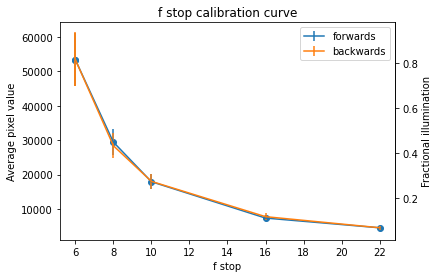

In [56]:
fwd_avg, fwd_std = get_average_and_std(forward)
back_avg, back_std = get_average_and_std(backward)
apertures = np.array([6, 6, 8, 10, 16, 22])

fig, ax = plt.subplots()
ax.scatter(apertures, fwd_avg)
ax.errorbar(apertures, fwd_avg, yerr=fwd_std, label='forwards')
ax.errorbar(apertures[::-1], back_avg, yerr=back_std, label='backwards')

secax_y = ax.secondary_yaxis(
    'right', functions=(lambda x: x/65565, lambda x: x*65565))
secax_y.set_ylabel(r'Fractional illumination')

plt.title('f stop calibration curve')
plt.ylabel('Average pixel value')
plt.xlabel('f stop')

plt.legend()

Text(0.5, 0, '$1/f\\ stop ^2$ ')

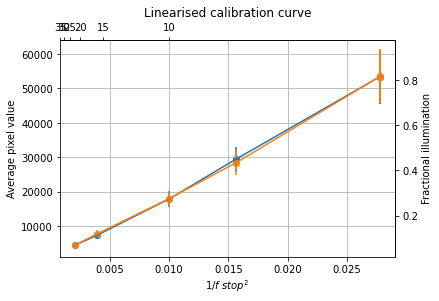

In [73]:
fig, ax = plt.subplots()

inv_aperture_squared = 1/(apertures**2)
plt.scatter(inv_aperture_squared, fwd_avg)
plt.scatter(inv_aperture_squared[::-1], back_avg)
plt.errorbar(inv_aperture_squared, fwd_avg, yerr=fwd_std, label='forwards')
plt.errorbar(inv_aperture_squared[::-1], back_avg, yerr=back_std, label='backwards')

def one_over_sqrt(x):
    """Vectorized 1/x, treating x==0 manually"""
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / np.sqrt(x[~near_zero])
    return x

def one_over_square(x):
    """Vectorized 1/x, treating x==0 manually"""
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / (x[~near_zero])**2
    return x


secax_y = ax.secondary_yaxis(
    'right', functions=(lambda x: x/65565, lambda x: x*65565))
secax_y.set_ylabel(r'Fractional illumination')

secax_x = ax.secondary_xaxis(
    'top', functions=(one_over_sqrt, one_over_square))
secax_x.set_xlabel(r'f stop')
secax_x.set_xlim([6,22])

plt.grid()
plt.title('Linearised calibration curve')
plt.ylabel('Average pixel value')
plt.xlabel('$1/f\ stop ^2$ ')